In [1]:
# using N-grams feature for capture contextual information from reviews...

import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re



# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'


df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHERECTER
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))



# SENTIMENT ANALYSE USING VADER
sia = SentimentIntensityAnalyzer()


# build function to generate N GRAMS
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# ADD N-GRAMS AS A NEW COLUMN
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=2))  # Change n as desired (e.g., n=2 for bigrams)


# SENTIMENT ANALYSIS ON N-GRAMS
for index, row in df.iterrows():
    if index < 5:
        review = row['reviewText']
        ngrams_list = row['ngrams']
        sentiment_scores = sia.polarity_scores(review)
        
        print(df['reviewText'])
        print("Sentiment Score:", sentiment_scores['compound'])
        print("N-grams:", ngrams_list)
        print()
    else:
        break


1       purchas devic work advertis never much phone m...
2       work expect sprung higher capac think made bit...
3       think work greathad diff bran 64gb card went s...
4       bought retail packag arriv legit orang envelop...
5       mini storag doesnt anyth els suppos purchas ad...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspir 3 ...
4911    use extend capabl samsung galaxi note 10 great...
4912    great card fast reliabl come option adapt sd s...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing 64gb micro sd card crap we...
Name: reviewText, Length: 4913, dtype: object
Sentiment Score: 0.0
N-grams: ['purchas devic', 'devic work', 'work advertis', 'advertis never', 'never much', 'much phone', 'phone memori', 'memori sinc', 'sinc download', 'download lot', 'lot stuff', 'stuff brainer']

1       purchas devic work advertis never much phone m...
2       work expect sprung higher capa

Sentiment Score: 0.0
N-grams: ['purchas devic', 'devic work', 'work advertis', 'advertis never', 'never much', 'much phone', 'phone memori', 'memori sinc', 'sinc download', 'download lot', 'lot stuff', 'stuff brainer']

Sentiment Score: 0.4019
N-grams: ['work expect', 'expect sprung', 'sprung higher', 'higher capac', 'capac think', 'think made', 'made bit', 'bit cheesier', 'cheesier earlier', 'earlier version', 'version paint', 'paint look', 'look clean']

Sentiment Score: 0.2732
N-grams: ['think work', 'work greathad', 'greathad diff', 'diff bran', 'bran 64gb', '64gb card', 'card went', 'went south', 'south 3', '3 monthsthi', 'monthsthi one', 'one held', 'held pretti', 'pretti well', 'well sinc', 'sinc s3', 's3 note3', 'note3 updat', 'updat 32114ive', '32114ive month', 'month zero', 'zero issu', 'issu sinc', 'sinc transfer', 'transfer s3', 's3 note3', 'note3 note2', 'note2 card', 'card reliabl', 'reliabl solidch']

Sentiment Score: 0.8591
N-grams: ['bought retail', 'retail packag', 'p

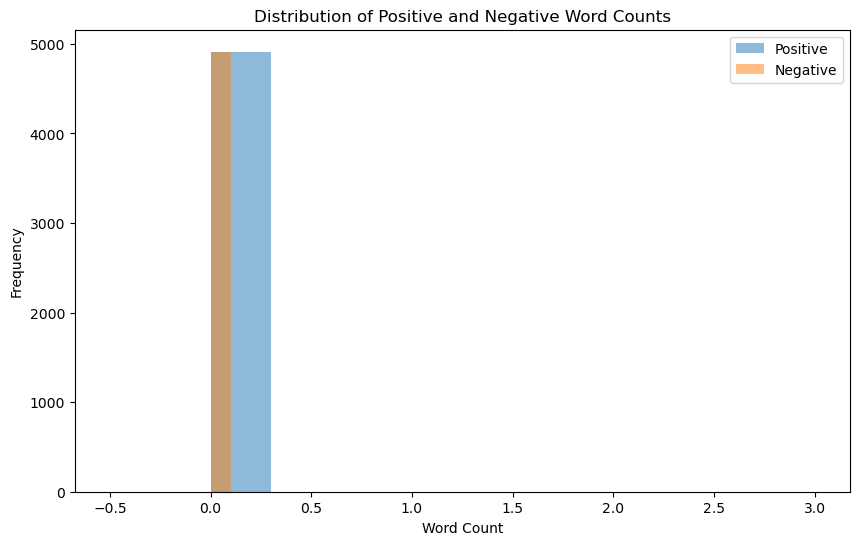

In [6]:

# perform positive and negative word count in each review using sentiment lexicons

import pandas as pd


import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# DATASET
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

df = pd.read_csv(file_path)

# DROP ANY MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URL
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARACTERS
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT ANALYSIS USING VADER
sia = SentimentIntensityAnalyzer()

# build function to generate N GRAMS
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# ADD N-GRAMS AS A NEW COLUMN
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=2))  # Change n as desired (e.g., n=2 for bigrams)

# SENTIMENT ANALYSIS ON N-GRAMS
positive_count = []
negative_count = []

for index, row in df.iterrows():
    review = row['reviewText']
    ngrams_list = row['ngrams']
    sentiment_scores = sia.polarity_scores(review)
    
    if index < 5:
        positive_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] > 0]))
        negative_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] < 0]))
        
    else:
        positive_count.append(0)
        negative_count.append(0)
    
    print("Sentiment Score:", sentiment_scores['compound'])
    print("N-grams:", ngrams_list)
    print()

#  POSSITIVE AND NEGATIVE  WORD COUNT 
df['Positive Word Count'] = positive_count
df['Negative Word Count'] = negative_count


# Plot the word counts
plt.figure(figsize=(10, 6))
plt.hist(df['Positive Word Count'], bins=10, alpha=0.5, label='Positive')
plt.hist(df['Negative Word Count'], bins=10, alpha=0.5, label='Negative')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Word Counts')
plt.legend()
plt.show()
